In [1]:
#We are using fredapi to fetch the economic data
%pip install fredapi > /dev/null

Note: you may need to restart the kernel to use updated packages.


#### We will require a fred api key to fetch data. Using api to fetch data eliminates the need of scraping or downloading data from different sources.
#### Use following link to create your api key: https://fredaccount.stlouisfed.org/apikey 

#### I have stored my api key in apiKey.json and importing it in credentials variable. Create your own API key and store it in json file. You can use all the secret variables by loading this file. Do not forget to add that file in gitignore.

In [8]:
#Loading API key in api_key variable
import json
try:
    with open('apiKey.json') as file:
        credentials = json.load(file)
except FileNotFoundError:
    print("File not found")
api_key = credentials['fredAPI']

In [2]:
#Importing required dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

In [5]:
#Style fivethirtyeight offers a clean and minimal look for the graphs and plots
plt.style.use('fivethirtyeight')

#Setting macimum number of columns to 500
pd.set_option('display.max_columns', 500)

#Getting the list od default colors
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]




In [9]:
#Importing Fred API 
from fredapi import Fred

#Assign API key 
fred_key = api_key

In [12]:
#Creating a Fred object
fred = Fred(api_key=fred_key)

#### Fred API offers two main options to get data.
#### 1. Search: Allwos us to search the economic data series using keywords. Matching series ids can be used to pull data for analysis and visualization.
#### 2 Pull: Once we identify the data series, we can use get_series() to pull the data for further analysis.

In [13]:
#Searching revelant data series of S&P500, ordering result by popularity
sp_search = fred.search('S&P',order_by='popularity')
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-19,2024-09-19,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-09-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-19 08:58:09-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-19,2024-09-19,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-19,2024-09-19,S&P 500,2014-09-19,2024-09-18,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-18 19:10:57-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-19,2024-09-19,Real Median Household Income in the United States,1984-01-01,2023-01-01,Annual,A,2023 CPI-U-RS Adjusted Dollars,2023 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2024-09-11 09:45:01-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-19,2024-09-19,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-09-18,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-19 08:58:12-05:00,82,This data represents the effective yield of th...


#### With the search function, we got the revelant data series. Now, we can use series id to pull the required data.

In [14]:
#Pulling data from series SP500 
sp500 = fred.get_series(series_id='SP500')

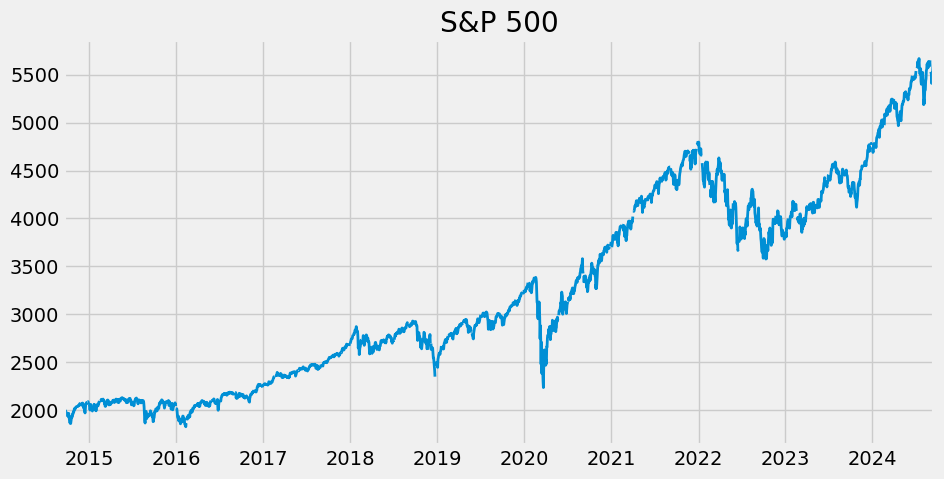

In [22]:
#Plotting the data points of SP500 data series
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)
plt.show()
